### 📊 this notebook is used as a source of truth for calculating the peformance of the work

In [9]:
import pandas as pd
import numpy as np
import math 
import statistics
from pandas import Timestamp
import math

In [31]:
# get stat for -old or new and then compare
def get_stat_for(file, authors, label='-new', extra='', time_a = 1, time_b = 1, time_c = 1):
    pd.set_option("display.max_columns", None)
    df = pd.read_csv(file)
 
    count = 0
    total = 0

    for (index, row) in df.iterrows():
        # calcualte total scores
        total_scores = {'history': 0, 'api': 0, 'code': 0, 'api_s': 0}

        for i in range(1, 11):
            h = row['history_at_' + str(i) + '_v']
            c = row['code_at_' + str(i) + '_v']
            a = row['api_at_' + str(i) + '_v']

            if str(h) != 'nan':
                total_scores['history'] += h
            if str(c) != 'nan':
                total_scores['code'] += c
            if str(a) != 'nan':
                total_scores['api'] += a
                
        # calcualte and rank developer scores
        scores = {}    

        for i in range(1, 11):
            h = row['history_at_' + str(i) + '_v']
            h_developer = row['history_at_' + str(i)]
            c = row['code_at_' + str(i) + '_v']
            c_developer = row['code_at_' + str(i)]
            a = row['api_at_' + str(i) + '_v']
            a_developer = row['api_at_' + str(i)]

#             if str(h_developer) != 'nan':
#                 if str(h) == 'nan' or h == 0 or total_scores['history'] <= 0:
#                     scores[h_developer] = scores.get(h_developer, []) + [0]
#                 else:
#                     scores[h_developer] = scores.get(h_developer, []) + [time_a * float(h * 100 / total_scores['history'])]

#             if str(c_developer) != 'nan':
#                 if str(c) == 'nan' or c == 0 or total_scores['code'] <= 0:
#                     scores[c_developer] = scores.get(c_developer, []) + [0]
#                 else:
#                     scores[c_developer] = scores.get(c_developer, []) + [time_b * float(c * 100 / total_scores['code'])]


            if str(a_developer) != 'nan':
                if str(a) == 'nan' or a == 0 or total_scores['api'] <= 0:
                    scores[a_developer] = scores.get(a_developer, []) + [0]
                else:
                    row['confidence'] = row['confidence'] * 2 / i
                    scores[a_developer] = scores.get(a_developer, []) + [time_c * row['confidence'] * float(a * 100 / total_scores['api'])]
                    pass

        # =====> BSBA       
        bsba_ = {}
        for i in range(1, 11):
            h = row['history_at_' + str(i) + '_v']
            h_developer = row['history_at_' + str(i)]
            c = row['code_at_' + str(i) + '_v']
            c_developer = row['code_at_' + str(i)]
            a = row['api_at_' + str(i) + '_v']
            a_developer = row['api_at_' + str(i)]

            if str(h_developer) != 'nan':
                if str(h) == 'nan' or h == 0 or total_scores['history'] <= 0:
                    bsba_[h_developer] = bsba_.get(h_developer, []) + [0]
                else:
                    bsba_[h_developer] = bsba_.get(h_developer, []) + [time_a * float(h * 100 / total_scores['history'])]

            if str(c_developer) != 'nan':
                if str(c) == 'nan' or c == 0 or total_scores['code'] <= 0:
                    bsba_[c_developer] = bsba_.get(c_developer, []) + [0]
                else:
                    bsba_[c_developer] = bsba_.get(c_developer, []) + [time_b * float(c * 100 / total_scores['code'])]
        for index_, score in bsba_.items():
            if len(score) == 0:
                bsba_[index_] = 0
            else:
                bsba_[index_] = sum(score)
        bsba_ = sorted(bsba_.items(), key=lambda x: x[1], reverse=True)
        # <=====
                

        # calculate the total
        for index_, score in scores.items():
            if len(score) == 0:
                scores[index_] = 0
            else:
                scores[index_] = sum(score)  ## ** (1/float(len(score)))


        sort = sorted(scores.items(), key=lambda x: x[1], reverse=True)

        chosen = ''
        if len(sort) != 0:
            chosen = sort[0][0]
        

        
        if chosen == row['assignees']:
            count += 1

            
        previous = row['assignees']
        total += 1

        if row['assignees'] not in authors:
            authors[row['assignees']] = {
                'total-new': 0, 'count_differently-new': 0, 'count-new': 0, 'count_history-new': 0, 'count_code-new': 0, 'count_api-new': 0,
                'total-old': 0, 'count_differently-old': 0, 'count-old': 0, 'count_history-old': 0, 'count_code-old': 0, 'count_api-old': 0,
                'false_positive-new': 0, 'false_positive-old': 0, 'bsba-new': 0, 'bsba-old': 0
                }
        if sort[0][0] not in authors:
            authors[sort[0][0]] = {
                'total-new': 0, 'count_differently-new': 0, 'count-new': 0, 'count_history-new': 0, 'count_code-new': 0, 'count_api-new': 0,
                'total-old': 0, 'count_differently-old': 0, 'count-old': 0, 'count_history-old': 0, 'count_code-old': 0, 'count_api-old': 0,
                'false_positive-new': 0, 'false_positive-old': 0, 'bsba-new': 0, 'bsba-old': 0
                }        
            
            

        authors[row['assignees']]['total' + label] += 1
        if row['assignees'] == row['history_at_1']:
            authors[row['assignees']]['count_history' + label] += 1
        if row['assignees'] == row['code_at_1']:
            authors[row['assignees']]['count_code' + label] += 1
        if row['assignees'] == row['api_at_1']:
            authors[row['assignees']]['count_api' + label] += 1
        if 1 == row['at_1']:
            authors[row['assignees']]['count' + label] += 1
        if 0 < len(sort) and sort[0][0] == row['assignees']:
            authors[row['assignees']]['count_differently' + label] += 1
        if sort[0][0] != row['assignees']:
            authors[sort[0][0]]['false_positive' + label] += 1
        if 0 < len(bsba_) and bsba_[0][0] == row['assignees']:  
            authors[row['assignees']]['bsba' + label] += 1
        
        previous = row['chosen']
        previous_time = row['report_time']
        previous_component = row['component']
   

    if extra == 'ratio':
        return count / total
    print(label)
    print(count)
    print(count / total)
    print(total)
    return authors



authors_ = {}
authors_ = get_stat_for('../data/output/jdt_direct.csv', authors_, '-new', '', 1, 1, 1)

# ave = 0
# for x in range(0, 5):
#     answer = get_stat_for('../data/output/l2r-style-outputs/jdt_direct_' + str(x) +'_.csv', {}, '-new', 'ratio', 1, 1, 1)
#     print(answer)
#     ave += answer
# print(ave / 5)

-new
223
0.37166666666666665
600


In [13]:
ave = 0
for x in range(0, 5):
    ave += get_stat_for('../data/output/jdt_direct_' + str(x) +'_.csv', {}, '-new', 'ratio', 1, 1, 1)
print(ave / 5)

FileNotFoundError: [Errno 2] No such file or directory: '../data/output/jdt_direct_0_.csv'

In [27]:
authors_df = pd.DataFrame.from_dict(authors_)

authors_df = authors_df[['Dani Megert', 'Markus Keller','Raksha Vasisht']]

<AxesSubplot:>

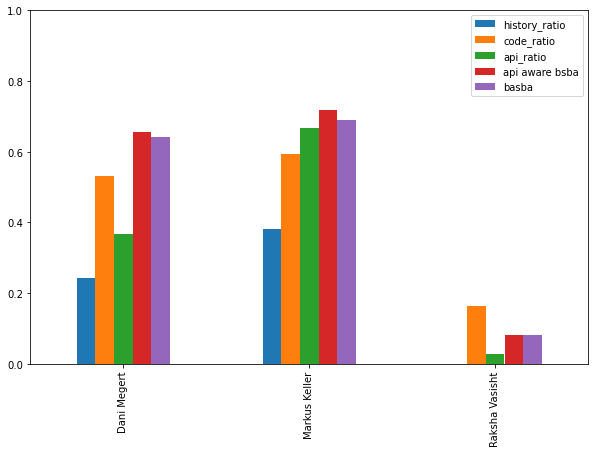

In [28]:
considered_df = authors_df.T
considered_df = considered_df[considered_df['total-new'] >= 10]


considered_df['api_ratio'] = considered_df['count_api-new']/considered_df['total-new']
considered_df['code_ratio'] = considered_df['count_code-new']/considered_df['total-new']
considered_df['history_ratio'] = considered_df['count_history-new']/considered_df['total-new']
considered_df['api aware bsba'] = considered_df['count_differently-new']/considered_df['total-new']
considered_df['false_positive'] = considered_df['false_positive-new']/considered_df['total-new']
considered_df['basba'] = considered_df['bsba-new']/considered_df['total-new']



considered_df[['history_ratio', 'code_ratio', 'api_ratio', 'api aware bsba', 'basba']].plot(kind="bar", ylim=(0,1), figsize=(10,6.5))